SMP Re-exam 2018
==

In [1]:
# Student number: 

In [1]:
from sympy import *
import sympy as sp
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf.

Assignment 1 (15%)
==

In [2]:
# a)
x = sp.Symbol('x')
f = (0.25)*x*sp.exp(-x/2)
Ex = integrate(x*f, (x,0,np.inf))
print("E(x) =", round(float(Ex), 2))

E(x) = 4.0


In [3]:
# b)
x = sp.Symbol('x')
f = 5*x**(-2)
Ex = integrate(x*f,(x,5,np.inf))
print("E(x) =", Ex)
print("E(x) = \u221e")

E(x) = oo
E(x) = ∞


In [4]:
# c)
a, b, c, d, x, y, u = symbols('a b c d x y u')
f = a+b*x**2
Ex = integrate(x*f, (x,0, 1))
F = integrate(f, (x, 0 , 1))
print(Ex)
print(F)

a/2 + b/4
a + b/3


In [44]:
# I get 2 equations with two unknowns and can solve (here using Gaussian Elimination)
display(Matrix([[1/2, 1/4, 3/5], [1, 1/3, 1]]).rref()[0])

Matrix([
[1, 0, 0.6],
[0, 1, 1.2]])

In [5]:
# You could also use Sympy
a, b = symbols('a b')
eq1 = Eq(0.5*a +0.25*b, 3/5)
eq2 = Eq(a+1/3 * b, 1)

solve((eq1, eq2), (a, b))

{a: 0.600000000000000, b: 1.20000000000000}

In [45]:
print("a = 0.6 = 3/5")
print("b = 1.2 = 6/5")

a = 0.6 = 3/5
b = 1.2 = 6/5


Assignment 2 (10%)
==

In [52]:
# a)
print("P(X > 10) = ", round(1-10/30,3))

P(X > 10) =  0.667


In [53]:
# b)
print("P(X > 25 | X > 15) = ", round((5/30)/(15/30),3))


P(X > 25 | X > 15) =  0.333


Assignment 3 (10%)
==

In [59]:
# a)
print("P(X \u2265 7) =", round(binom.sf(6, 10, 0.5), 3))


P(X ≥ 7) = 0.172


In [66]:
# b)
# Let A denote that part was changed and let B denote that part 2 was changed
pA = 0.36
pB = 0.42
AandB1 = pA*pB
AandB2 = 0.3

print(AandB1 == AandB2)

print("P(B|A) = ", round(AandB2/pA, 3))

False
P(B|A) =  0.833


Assignment 4 (25%)
==

In [7]:
# Ask user for a file directory string
file_directory = input("Enter a file directory: ")

# Reverse the direction of the backslashes in the string
reversed_directory = file_directory.replace('\\', '/')

# Print the updated file directory string
print("Reversed file directory: ", reversed_directory)

Enter a file directory: C:\Users\Richard\OneDrive - ViaUC\Arbejde\Stochastic modeling and processes\Previous Exams\Batteries.xlsx
Reversed file directory:  C:/Users/Richard/OneDrive - ViaUC/Arbejde/Stochastic modeling and processes/Previous Exams/Batteries.xlsx


In [8]:
# a)
df = pd.read_excel(
    'C:/Users/Richard/OneDrive - ViaUC/Arbejde/Stochastic modeling and processes/Previous Exams/Batteries.xlsx'
)
df.head()

,Producer 1,Producer 2
0,2.1162,1.1259
1,2.5135,3.1725
2,1.8137,2.4492
3,0.8075,3.7766
4,1.5554,4.4673


In [9]:
q3, q1 = np.percentile(df['Producer 1'], [75,25])
iqr = q3 - q1
upper = q3+1.5*iqr
lower = q1 - 1.5*iqr
average = df.loc[(df['Producer 1'] < upper) & (df['Producer 1'] > lower)  , 'Producer 1'].mean()
df['Producer 1'] = np.where((df['Producer 1'] > upper) | (df['Producer 1'] < lower), average, df['Producer 1'])

In [10]:
q3, q1 = np.percentile(df['Producer 2'], [75,25])
iqr = q3 - q1
upper = q3+1.5*iqr
lower = q1 - 1.5*iqr
average = df.loc[(df['Producer 2'] < upper) & (df['Producer 2'] > lower)  , 'Producer 2'].mean()
df['Producer 2'] = np.where((df['Producer 2'] > upper) | (df['Producer 2'] < lower), average, df['Producer 2'])

In [26]:
# b)
df1 = df['Producer 1']
df2 = df['Producer 2']

print('Producer 1: ')
print('q1 = ', round(df1.quantile(0.25), 4))
print('q2 = ', round(df1.quantile(0.5), 4))
print('q3 = ', round(df1.quantile(0.75), 4))
print('q4 = ', round(df1.quantile(1), 4))
print('average = ', round(df1.mean(), 4))
print('std = ', round(df1.std(), 4))
print('std = ', round(df1.var(), 4))
print(' ')
print('Producer 2: ')
print('q1 = ', round(df2.quantile(0.25), 4))
print('q2 = ', round(df2.quantile(0.5), 4))
print('q3 = ', round(df2.quantile(0.75), 4))
print('q4 = ', round(df2.quantile(1), 4))
print('average = ', round(df2.mean(), 4))
print('std = ', round(df2.std(), 4))
print('std = ', round(df2.var(), 4))

Producer 1: 
q1 =  1.1888
q2 =  1.9196
q3 =  2.4074
q4 =  3.637
average =  1.9029
std =  0.9109
std =  0.8298
 
Producer 2: 
q1 =  2.0375
q2 =  2.5158
q3 =  3.0069
q4 =  4.4673
average =  2.4776
std =  0.9124
std =  0.8325


In [65]:
# c) Using t.interval
from scipy import stats
n = len(df1)
mean = np.mean(df1)
SE = stats.sem(df1)
Level = 0.95

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('An ' + repr(Level*100) + ' % upper confidence interval for the sample mean is ['
      + repr(round(CI[0],2)) + '; ' + repr(round(CI[1],2)) + ']')

An 95.0 % upper confidence interval for the sample mean is [1.56; 2.24]


95% Confidence Interval mean Producer 1: [1.56, 2.24]


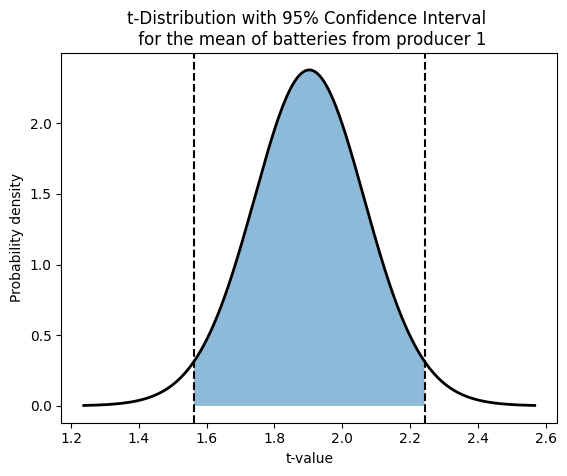

95% Confidence Interval mean Producer 2: [2.14, 2.82]


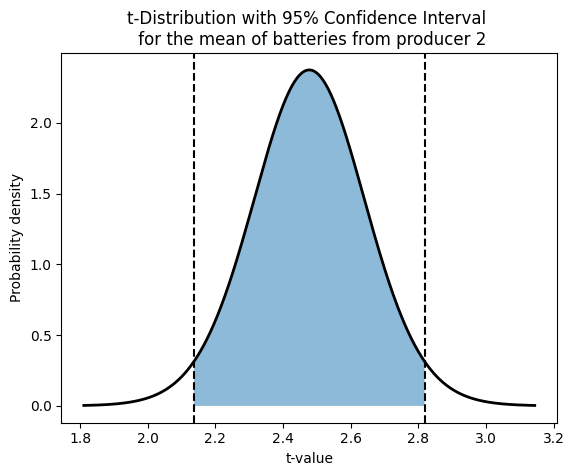

In [67]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Using the formula
data = df1

# Calculate the mean and standard deviation of the data
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # ddof=1 gives an unbiased estimator of the population std dev

# Calculate the standard error of the mean
std_error = std_dev / np.sqrt(len(data))

# Set the significance level and degrees of freedom for the t-distribution
alpha = 0.05  # 95% confidence level
dof = len(data) - 1

# Calculate the critical t-value for the two-tailed t-test
t_crit = stats.t.ppf(1 - alpha/2, dof)

# Calculate the confidence interval for the mean
lower = mean - t_crit * std_error
upper = mean + t_crit * std_error

# Print the confidence interval
print("95% Confidence Interval mean Producer 1: [{:.2f}, {:.2f}]".format(lower, upper))

# Plot the t-distribution with the rejection region shaded
x = np.linspace(mean-4*std_error, mean+4*std_error, 1000)
y = stats.t.pdf(x,dof, mean, std_error)
plt.plot(x, y, 'k', linewidth=2)
shade = np.linspace(lower, upper, 300)
plt.fill_between(shade, stats.t.pdf(shade, dof, mean, std_error), alpha=0.5)
plt.axvline(x=lower, linestyle='--', color='k')
plt.axvline(x=upper, linestyle='--', color='k')
plt.title("t-Distribution with 95% Confidence Interval \n for the mean of batteries from producer 1")
plt.xlabel("t-value")
plt.ylabel("Probability density")
plt.show()

# Using the formula
data = df2

# Calculate the mean and standard deviation of the data
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # ddof=1 gives an unbiased estimator of the population std dev

# Calculate the standard error of the mean
std_error = std_dev / np.sqrt(len(data))

# Set the significance level and degrees of freedom for the t-distribution
alpha = 0.05  # 95% confidence level
dof = len(data) - 1

# Calculate the critical t-value for the two-tailed t-test
t_crit = stats.t.ppf(1 - alpha/2, dof)

# Calculate the confidence interval for the mean
lower = mean - t_crit * std_error
upper = mean + t_crit * std_error

# Print the confidence interval
print("95% Confidence Interval mean Producer 2: [{:.2f}, {:.2f}]".format(lower, upper))

# Plot the t-distribution with the rejection region shaded
x = np.linspace(mean-4*std_error, mean+4*std_error, 1000)
y = stats.t.pdf(x,dof, mean, std_error)
plt.plot(x, y, 'k', linewidth=2)
shade = np.linspace(lower, upper, 300)
plt.fill_between(shade, stats.t.pdf(shade, dof, mean, std_error), alpha=0.5)
plt.axvline(x=lower, linestyle='--', color='k')
plt.axvline(x=upper, linestyle='--', color='k')
plt.title("t-Distribution with 95% Confidence Interval \n for the mean of batteries from producer 2")
plt.xlabel("t-value")
plt.ylabel("Probability density")
plt.show()

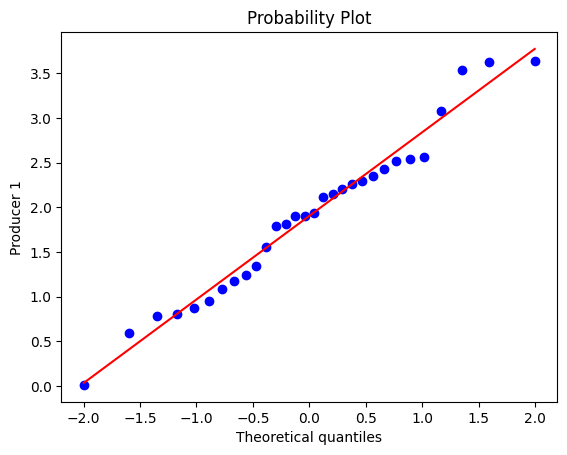

Skewness = 0.1134
Kurtosis = -0.4326


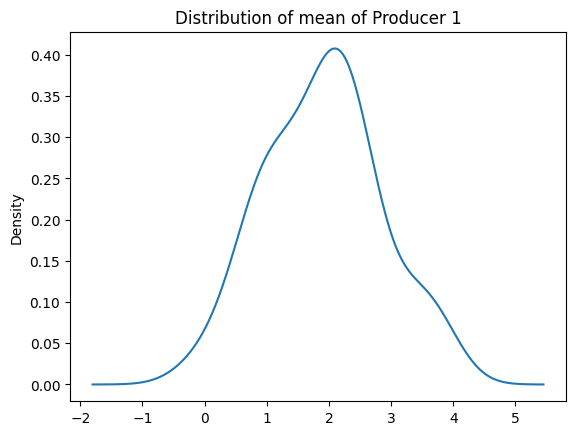

In [82]:
# d)
stats.probplot(df1, plot=plt)
plt.ylabel('Producer 1')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df1),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df1),4)))
fig, ax = plt.subplots()
df1.plot.kde(ax=ax, legend=False, title='Distribution of mean of Producer 1');

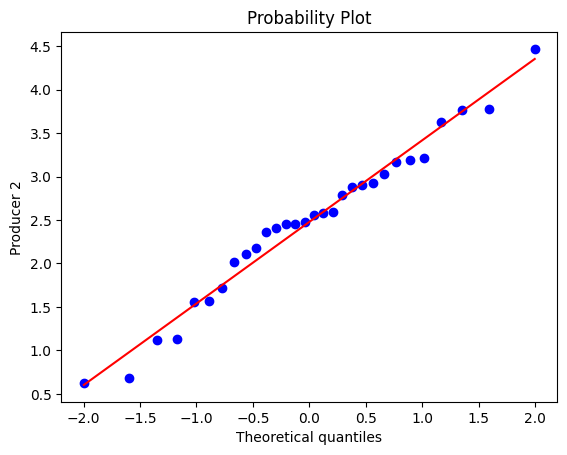

Skewness = -0.1821
Kurtosis = -0.19


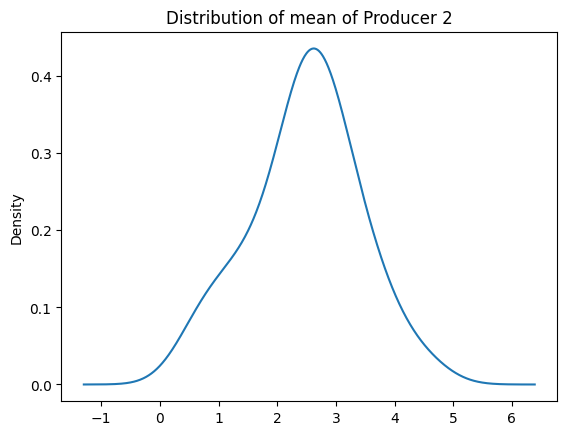

In [83]:

stats.probplot(df2, plot=plt)
plt.ylabel('Producer 2')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df2),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df2),4)))
fig, ax = plt.subplots()
df2.plot.kde(ax=ax, legend=False, title='Distribution of mean of Producer 2');

95% Confidence Interval for the Difference in Means: [-1.05, -0.10]


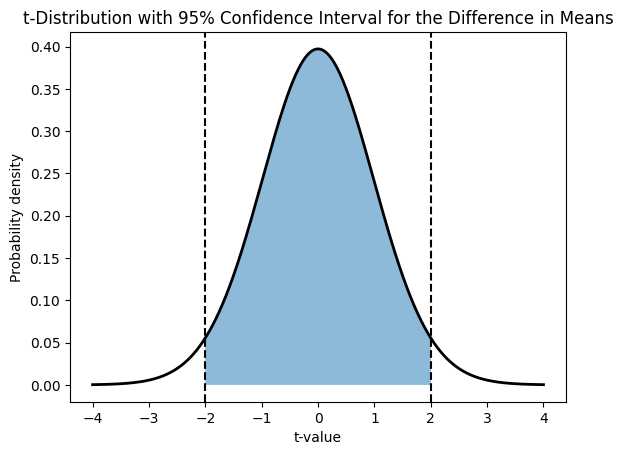

In [75]:
# e)

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate some sample data for two independent samples (replace this with your own data)
data1 = df1
data2 = df2

# Calculate the mean and standard deviation of the data
mean1 = np.mean(data1)
mean2 = np.mean(data2)
std_dev1 = np.std(data1, ddof=1)  # ddof=1 gives an unbiased estimator of the population std dev
std_dev2 = np.std(data2, ddof=1)

# Calculate the standard error of the difference in means
std_error = np.sqrt((std_dev1 ** 2 / len(data1)) + (std_dev2 ** 2 / len(data2)))

# Set the significance level and degrees of freedom for the t-distribution
alpha = 0.05  # 95% confidence level
df = len(data1) + len(data2) - 2

# Calculate the critical t-value for the two-tailed t-test
t_crit = stats.t.ppf(1 - alpha/2, df)

# Calculate the confidence interval for the difference in means
diff = mean1 - mean2
lower = diff - t_crit * std_error
upper = diff + t_crit * std_error

# Print the confidence interval
print("95% Confidence Interval for the Difference in Means: [{:.2f}, {:.2f}]".format(lower, upper))

# Plot the t-distribution with the rejection region shaded
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)
plt.plot(x, y, 'k', linewidth=2)
shade1 = np.linspace(-t_crit, t_crit, 300)
plt.fill_between(shade1, stats.t.pdf(shade1, df), alpha=0.5)
plt.axvline(x=t_crit, linestyle='--', color='k')
plt.axvline(x=-t_crit, linestyle='--', color='k')
plt.title("t-Distribution with 95% Confidence Interval for the Difference in Means")
plt.xlabel("t-value")
plt.ylabel("Probability density")
plt.show()


Reject since  0.0177  <  0.05


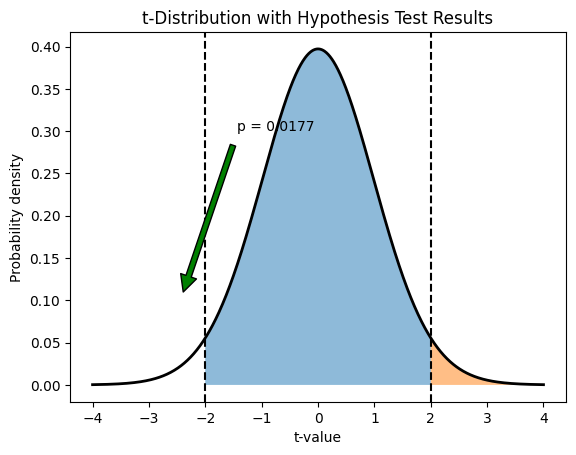

In [91]:
# f)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate some sample data for two independent samples (replace this with your own data)
data1 = df1
data2 = df2

# Calculate the mean and standard deviation of the data
mean1 = np.mean(data1)
mean2 = np.mean(data2)
std_dev1 = np.std(data1, ddof=1)  # ddof=1 gives an unbiased estimator of the population std dev
std_dev2 = np.std(data2, ddof=1)

# Set the significance level
alpha = 0.05  # 95% confidence level

# Perform a two-sample t-test with equal variances
t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=True)

# Calculate the critical t-value for the two-tailed t-test
t_crit = stats.t.ppf(1 - alpha/2, len(data1) + len(data2) - 2)

# Print the results of the hypothesis test
if p_value < alpha:
    print("Reject since ", round(p_value, 4), ' < ', alpha)
else:
    print("Fail to reject since ", round(p_value, 4) , '\u2265' , alpha)

# Plot the t-distribution with the rejection region shaded
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, len(data1) + len(data2) - 2)
plt.plot(x, y, 'k', linewidth=2)
shade1 = np.linspace(-t_crit, t_crit, 300)
shade2 = np.linspace(t_crit, 4, 300)
plt.fill_between(shade1, stats.t.pdf(shade1, len(data1) + len(data2) - 2), alpha=0.5)
plt.fill_between(shade2, stats.t.pdf(shade2, len(data1) + len(data2) - 2), alpha=0.5)
plt.axvline(x=t_crit, linestyle='--', color='k')
plt.axvline(x=-t_crit, linestyle='--', color='k')

# Add an arrow pointing to the position on the x-axis where the p-value lies
if p_value < alpha/2:
    plt.annotate("p = {:.4f}".format(p_value), xy=(t_stat, 0.1), xytext=(t_stat + 1, 0.3),
                 arrowprops=dict(facecolor='green', shrink=0.05))
elif p_value > 1 - alpha/2:
    plt.annotate("p = {:.4f}".format(p_value), xy=(t_stat, 0.1), xytext=(t_stat - 1, 0.3),
                 arrowprops=dict(facecolor='green', shrink=0.05))
else:
    plt.annotate("p = {:.4f}".format(p_value), xy=(t_stat, 0.1), xytext=(t_stat, 0.3),
                 arrowprops=dict(facecolor='green', shrink=0.05))

plt.title("t-Distribution with Hypothesis Test Results")
plt.xlabel("t-value")
plt.ylabel("Probability density")
plt.show()


In [92]:
# g)

import numpy as np
import scipy.stats as stats

# Generate some sample data for two independent samples (replace this with your own data)
data1 = df1
data2 = df2

# Calculate the variance and standard deviation of the data
var1 = np.var(data1, ddof=1)  # ddof=1 gives an unbiased estimator of the population variance
var2 = np.var(data2, ddof=1)
std_dev1 = np.std(data1, ddof=1)
std_dev2 = np.std(data2, ddof=1)

# Set the significance level
alpha = 0.05  # 95% confidence level

# Perform a two-sample F-test to test the null hypothesis that the standard deviations are equal
F_stat = var1 / var2
F_crit1 = stats.f.ppf(alpha/2, len(data1)-1, len(data2)-1)
F_crit2 = stats.f.ppf(1-alpha/2, len(data1)-1, len(data2)-1)

# Print the results of the hypothesis test
if F_stat < F_crit1 or F_stat > F_crit2:
    print("Reject the null hypothesis: the standard deviations are different")
else:
    print("Fail to reject the null hypothesis: the standard deviations are not different")



Fail to reject the null hypothesis: the standard deviations are not different


Assignment 5 (20%)
==

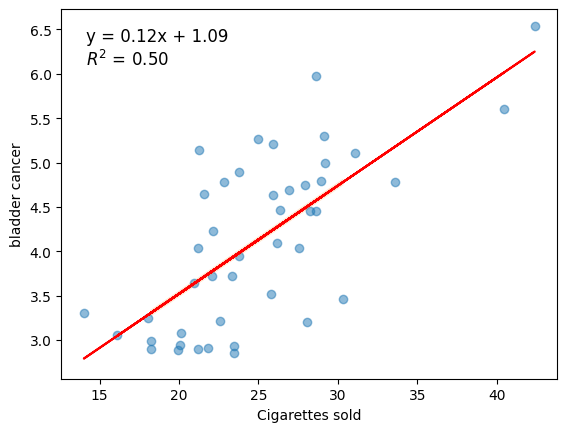

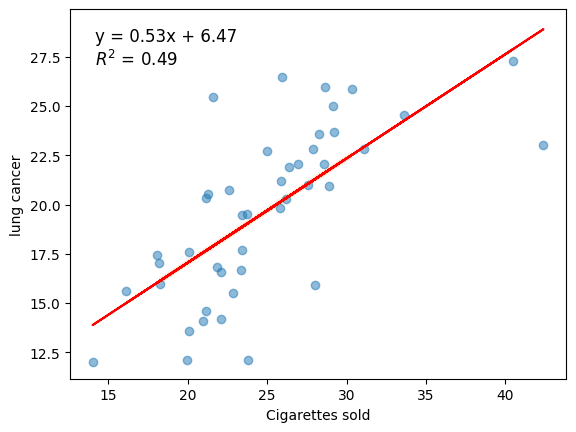

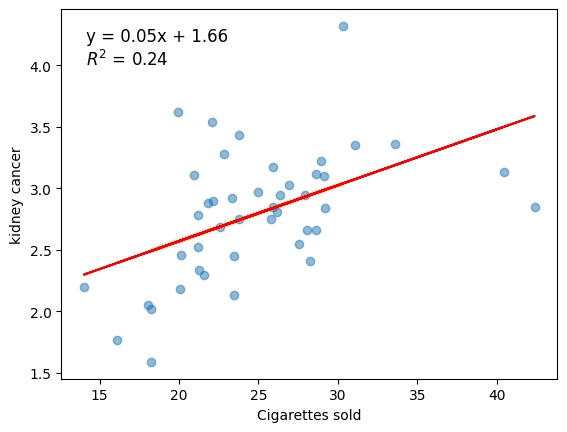

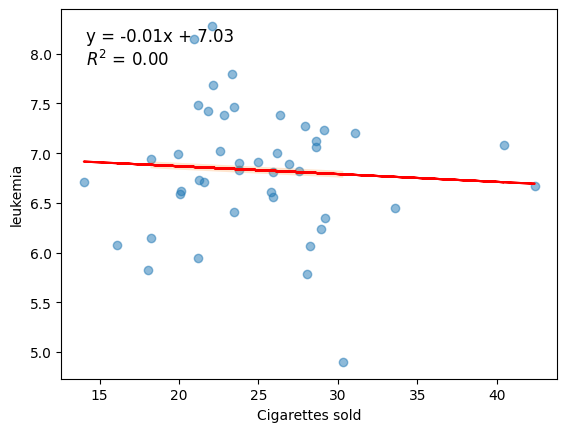

In [117]:
# a)

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Read in the data from the Excel file
df = pd.read_excel('C:/Users/Richard/OneDrive - ViaUC/Arbejde/Stochastic modeling and processes/Previous Exams/Smoking and Cancer.xlsx')


# Define a list of the dependent variables (the four types of cancer)
dependent_vars = ['bladder cancer', 'lung cancer', 'kidney cancer', 'leukemia']

# Loop over each dependent variable and build a regression model
for var in dependent_vars:
    # Extract the independent and dependent variables for this model
    x = df['Cigarettes sold']
    y = df[var]

    # Calculate the linear regression model
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Generate the scatterplot and trend line with confidence intervals
    fig, ax = plt.subplots()
    ax.scatter(x, y, alpha=0.5)
    ax.plot(x, intercept + slope * x, 'r')
    ax.fill_between(x, intercept + slope * x - 1.96*std_err, intercept + slope * x + 1.96*std_err, alpha=0.2)
    ax.set_xlabel('Cigarettes sold')
    ax.set_ylabel(var)

    # Add the regression equation to the plot
    equation = f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}'
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=12, verticalalignment='top')

    # Display the plot
    plt.show()




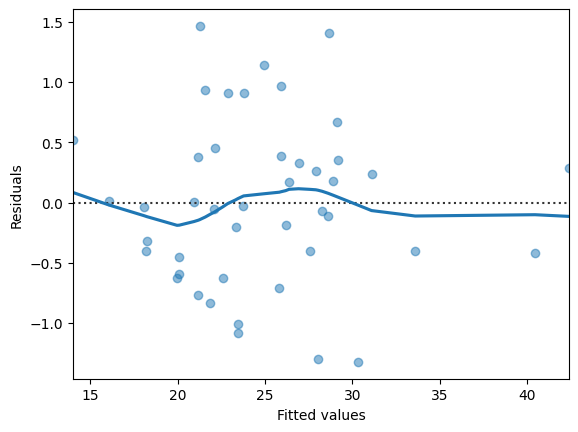

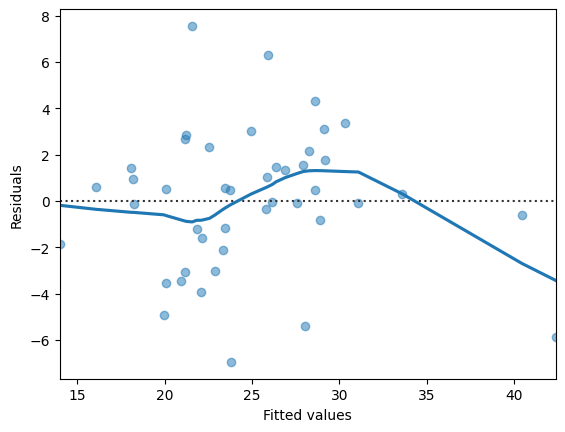

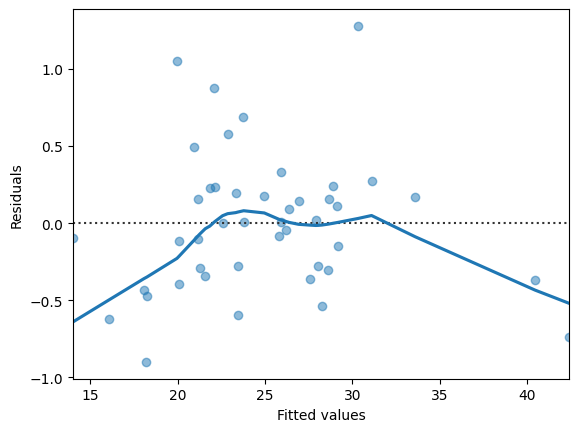

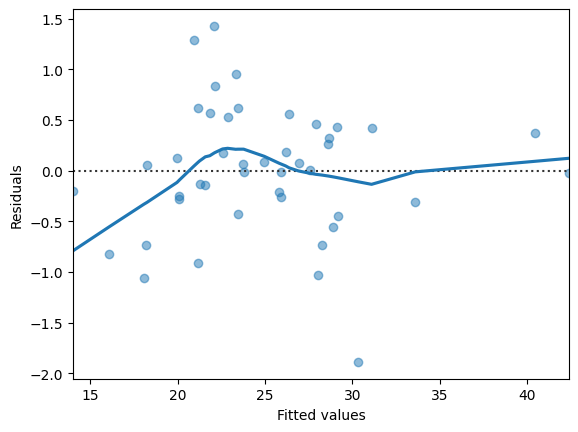

In [123]:
# b)
import seaborn as sns

# Define a list of the dependent variables (the four types of cancer)
dependent_vars = ['bladder cancer', 'lung cancer', 'kidney cancer', 'leukemia']

# Loop over each dependent variable and build a regression model
for var in dependent_vars:
    # Extract the independent and dependent variables for this model
    x = df['Cigarettes sold']
    y = df[var]

    # Calculate the linear regression model
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Generate a residual plot to inspect the assumptions of the linear regression
    residuals = y - (intercept + slope * x)
    sns.residplot(x=x, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')

    # Display the plot
    plt.show()


In [124]:
# c)
# Extract the independent and dependent variables for the bladder cancer model
x = df['Cigarettes sold']
y = df['bladder cancer']

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Print the correlation coefficient
print('Correlation coefficient for bladder cancer model:', r_value)


Correlation coefficient for bladder cancer model: 0.703621859461442


In [125]:
# d)
# Compute R-squared
r_squared = r_value ** 2

# Print the correlation coefficient and R-squared
print('R-squared for bladder cancer model:', r_squared)
# half the variance of the data set is explained by the model

Correlation coefficient for bladder cancer model: 0.703621859461442
R-squared for bladder cancer model: 0.4950837211119772


In [128]:
# e)

# Extract the independent and dependent variables for the bladder cancer model
x = df['Cigarettes sold']
y = df['bladder cancer']

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

def predict_bladder_cancer(cigarettes_sold):
    # Predict the bladder cancer rate
    bladder_cancer_rate = slope * cigarettes_sold + intercept

    return bladder_cancer_rate
# Predict the bladder cancer rate for cigarette sales of 40 and 50
print('Death rate for Bladder cancer for cigarette sales of 40:', round(predict_bladder_cancer(40), 2))
print('Death rate for Bladder cancer for cigarette sales of 50:', round(predict_bladder_cancer(50), 2))

Bladder cancer rate for cigarette sales of 40: 5.96
Bladder cancer rate for cigarette sales of 50: 7.18


Assignment 6 (20%)
==

In [104]:
# a)
df = pd.read_excel(
    'C:/Users/Richard/OneDrive - ViaUC/Arbejde/Stochastic modeling and processes/Previous Exams/Titanic.xlsx'
)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,alone,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,1,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [106]:
# Create a contingency table with the number of survivors and non-survivors for each passenger class
contingency_table = pd.crosstab(df['survived'], df['pclass'])

# Display the contingency table
print(contingency_table)

pclass      1    2    3
survived               
0         123  158  528
1         200  119  181


In [107]:
# b)
import pandas as pd
import scipy.stats as stats

# Perform a chi-squared test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results of the hypothesis test
if p_value < 0.05:
    print("Reject the null hypothesis: 'pclass' and 'survived' are not independent")
else:
    print("Fail to reject the null hypothesis: 'pclass' and 'survived' are independent")


Reject the null hypothesis: 'pclass' and 'survived' are not independent


In [108]:
# c)
# Create a contingency table with the number of survivors and non-survivors for each passenger class
contingency_table = pd.crosstab(df['sex'], df['survived'])

# Display the contingency table
print(contingency_table)

survived    0    1
sex               
female    127  339
male      682  161


In [109]:
# d)
# Perform a chi-squared test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results of the hypothesis test
if p_value < 0.05:
    print("Reject the null hypothesis: 'sex' and 'survived' are not independent")
else:
    print("Fail to reject the null hypothesis: 'sex' and 'survived' are independent")


Reject the null hypothesis: 'sex' and 'survived' are not independent


In [110]:
# e)
# Create a contingency table with the number of survivors and non-survivors for each passenger class
contingency_table = pd.crosstab(df['alone'], df['survived'])

# Display the contingency table
print(contingency_table)

survived    0    1
alone             
0         258  261
1         551  239


In [111]:
# f)
# Perform a chi-squared test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results of the hypothesis test
if p_value < 0.05:
    print("Reject the null hypothesis: 'alone' and 'survived' are not independent")
else:
    print("Fail to reject the null hypothesis: 'alone' and 'survived' are independent")

Reject the null hypothesis: 'alone' and 'survived' are not independent
